# Agriculture

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore") #to ignore warnings
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score

In [2]:
df=pd.read_csv('train_agriculture.csv')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
df.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0
4598,F00008083,2267,0,1,2,10,33.0,17,2,0


In [5]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [8]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [9]:
for col in ['Number_Weeks_Used']:
    df[col].fillna(df[col].mode()[0], inplace=True)
    #NaN replaced to 0

In [10]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [11]:
df.shape

(4599, 10)

In [12]:
df['Crop_Damage'].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [13]:
df['Crop_Damage'].value_counts(normalize=True)

0    0.830615
1    0.144379
2    0.025005
Name: Crop_Damage, dtype: float64

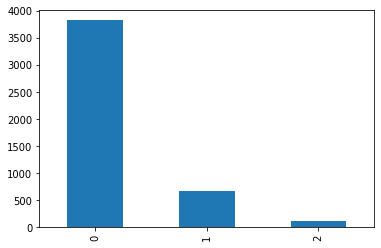

In [14]:
df['Crop_Damage'].value_counts().plot.bar()

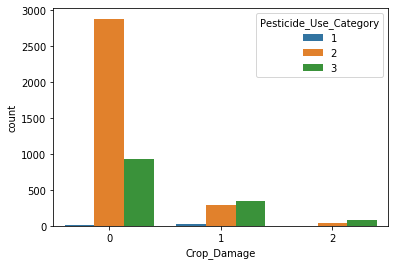

In [15]:
sns.countplot(df['Crop_Damage'],hue=df['Pesticide_Use_Category'])

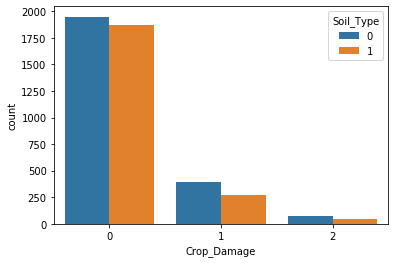

In [18]:
sns.countplot(df['Crop_Damage'],hue=df['Soil_Type'])

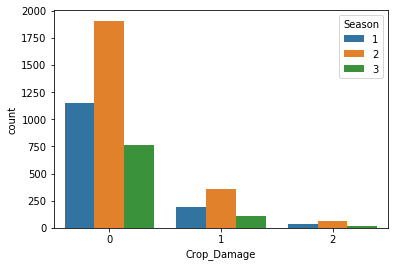

In [19]:
sns.countplot(df['Crop_Damage'],hue=df['Season'])

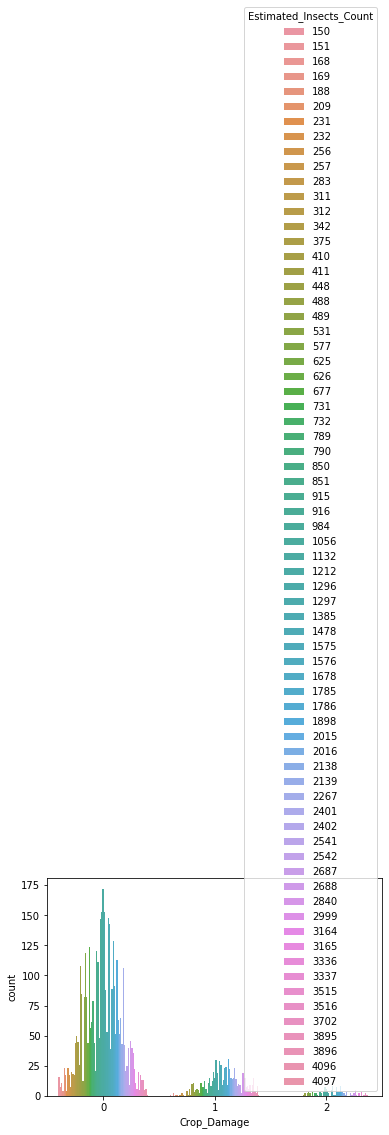

In [24]:
sns.countplot(df['Crop_Damage'],hue=df['Estimated_Insects_Count'])

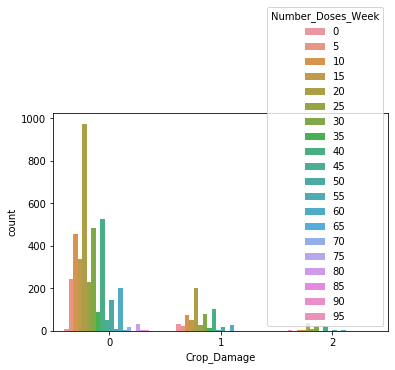

In [25]:
sns.countplot(df['Crop_Damage'],hue=df['Number_Doses_Week'])

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [23]:
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,0,1,0,0.0,0,1,0
1,1,209,1,0,1,0,0.0,0,2,1
2,2,257,1,0,1,0,0.0,0,2,1
3,3,257,1,1,1,0,0.0,0,2,1
4,4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,4594,2138,0,1,2,20,20.0,1,1,1
4595,4595,2139,0,1,2,30,47.0,2,1,1
4596,4596,2267,0,1,2,10,7.0,27,2,0
4597,4597,2267,0,1,2,10,20.0,24,2,0


In [29]:
df.drop(['ID','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1,inplace=True)

In [30]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
0,188,1,0,1,1,0
1,209,1,0,1,2,1
2,257,1,0,1,2,1
3,257,1,1,1,2,1
4,342,1,0,1,2,1


In [31]:
x=df

In [42]:
x.drop(['Crop_Damage'],axis=1,inplace=True)

In [43]:
x

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season
0,188,1,0,1,1
1,209,1,0,1,2
2,257,1,0,1,2
3,257,1,1,1,2
4,342,1,0,1,2
...,...,...,...,...,...
4594,2138,0,1,2,1
4595,2139,0,1,2,1
4596,2267,0,1,2,2
4597,2267,0,1,2,2


In [33]:
test=pd.read_csv('test_agriculture.csv')
test

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1


In [34]:
test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [36]:
test.shape

(1199, 9)

In [37]:
for col in ['Number_Weeks_Used']:
    test[col].fillna(test[col].mode()[0], inplace=True)
    #NaN replaced to 0

In [38]:
test.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [39]:
for col in test.columns:
    if test[col].dtypes == 'object':
        test[col] = le.fit_transform(test[col])

In [40]:
test.drop(['ID','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit'],axis=1,inplace=True)

In [41]:
test.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season
0,188,1,1,1,2
1,410,1,1,1,2
2,626,1,0,1,2
3,731,1,0,1,2
4,789,0,0,1,1


In [44]:
test.shape

(1199, 5)

In [45]:
x.shape

(4599, 5)

In [46]:
y=test
y

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season
0,188,1,1,1,2
1,410,1,1,1,2
2,626,1,0,1,2
3,731,1,0,1,2
4,789,0,0,1,1
...,...,...,...,...,...
1194,1132,0,1,2,3
1195,1132,0,1,2,1
1196,1132,0,1,2,1
1197,1212,0,1,2,1
